In [186]:
import numpy as np
import pandas as pd

In [187]:
import os
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt

In [188]:
image_path = r'C:\Users\KIIT\Documents\roco_dataset_extracted\all_data\train\radiology\images'

caption=r'C:\Users\KIIT\Documents\roco_dataset_extracted\all_data\train\radiology\captions.txt'

In [189]:
df = pd.read_table(caption, header=None, names=['image_name', 'caption'])
print(df.head())

   image_name                                            caption
0  ROCO_00002   Computed tomography scan in axial view showin...
1  ROCO_00003   Bacterial contamination occurred after comple...
2  ROCO_00004   The patient had residual paralysis of the han...
3  ROCO_00005      Panoramic radiograph after immediate loading.
4  ROCO_00007   Plain abdomen x-ray: Multiple air levels at t...


In [190]:
df.describe()

,image_name,caption
count,65450,65450
unique,65450,64772
top,ROCO_00002,Initial panoramic radiograph.
freq,1,19


In [191]:
df['caption_length']=df['caption'].str.len()

In [192]:
df.head()

,image_name,caption,caption_length
0,ROCO_00002,Computed tomography scan in axial view showin...,88
1,ROCO_00003,Bacterial contamination occurred after comple...,142
2,ROCO_00004,The patient had residual paralysis of the han...,320
3,ROCO_00005,Panoramic radiograph after immediate loading.,46
4,ROCO_00007,Plain abdomen x-ray: Multiple air levels at t...,124


In [193]:
print(df['caption_length'].describe())

count    65450.000000
mean       138.963453
std        104.237943
min          3.000000
25%         73.000000
50%        114.000000
75%        175.000000
max       2855.000000
Name: caption_length, dtype: float64


In [194]:
dlink_url = r'C:\Users\KIIT\Documents\roco_dataset_extracted\all_data\train\radiology\dlinks.txt'
dlink = pd.read_table(dlink_url, header=None, names=['image_id', 'dlink', 'image'])
print(dlink)

         image_id                                              dlink  \
0      ROCO_00002  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
1      ROCO_00003  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
2      ROCO_00004  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
3      ROCO_00005  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
4      ROCO_00007  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
...           ...                                                ...   
65445  ROCO_81819  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
65446  ROCO_81820  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
65447  ROCO_81821  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
65448  ROCO_81822  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
65449  ROCO_81823  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   

                                    image  
0                     AMHSR-4-14-g002.jpg  
1                  IJD2009-150251.001.jpg  
2  

In [195]:
dlink.describe()

,image_id,dlink,image
count,65450,65450,65450
unique,65450,37396,60990
top,ROCO_00002,wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...,gr1.jpg
freq,1,37,1444


In [196]:
# Define paths for each split (train, test, validation) and categories (radiology, non-radiology)
base_dir = r'C:\Users\KIIT\Documents\roco_dataset_extracted\all_data'

# Define the splits and categories
splits = ['train', 'test', 'validation']
categories = ['radiology', 'non-radiology']

# Initialize an empty list to store the data
data = []

# Loop through each split and category to read captions
for split in splits:
    for category in categories:
        # Define paths for images and captions.txt
        category_dir = os.path.join(base_dir, split, category)
        captions_file = os.path.join(category_dir, 'captions.txt')
        
        # Read the captions file if it exists
        if os.path.exists(captions_file):
            with open(captions_file, 'r', encoding='utf-8', errors='ignore') as file:
                # Read each line in the captions file
                for line in file:
                    image_id = line[:12]    # Assuming the first 12 characters are the image ID
                    caption = line[12:].strip()  # The rest of the line is the caption text
                    label = category  # Set label as 'radiology' or 'non-radiology'
                    
                    # Append to data list with image ID, caption, label, and split type
                    data.append([image_id, caption, label, split])

# Create a DataFrame with the collected data
df = pd.DataFrame(data, columns=['image_id', 'caption', 'label', 'split'])

# Display the first few rows of the DataFrame to verify
df


,image_id,caption,label,split
0,ROCO_00002\t,Computed tomography scan in axial view showing...,radiology,train
1,ROCO_00003\t,Bacterial contamination occurred after complet...,radiology,train
2,ROCO_00004\t,The patient had residual paralysis of the hand...,radiology,train
3,ROCO_00005\t,Panoramic radiograph after immediate loading.,radiology,train
4,ROCO_00007\t,Plain abdomen x-ray: Multiple air levels at th...,radiology,train
...,...,...,...,...
79743,ROCO_87894\t,Scanning electron photomicrograph of blood cel...,non-radiology,validation
79744,ROCO_87904\t,SEM of Solenopsis elhawagryi sp. n. minor work...,non-radiology,validation
79745,ROCO_87918\t,Under visualization through the anterolateral ...,non-radiology,validation
79746,ROCO_87936\t,The endoscopic view demonstrated progressive d...,non-radiology,validation


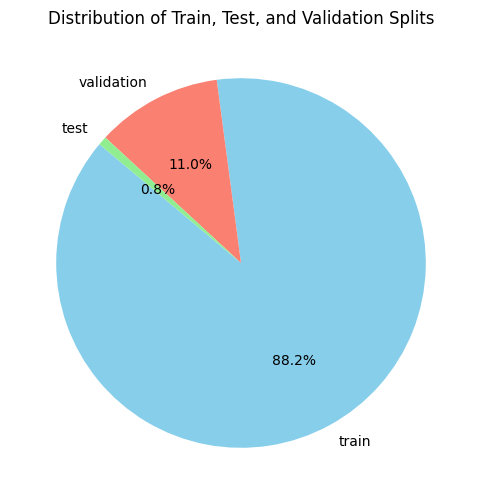

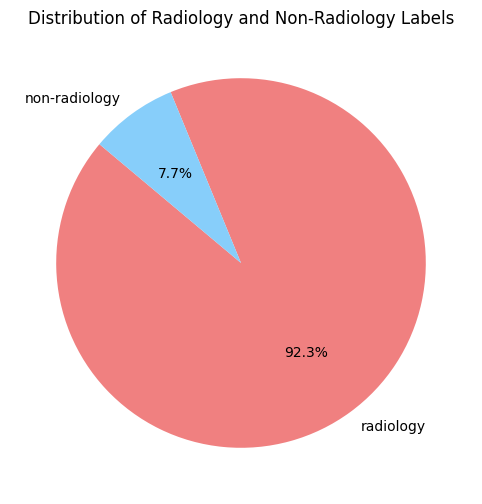

In [197]:
import matplotlib.pyplot as plt

# Pie chart for train/test/validation distribution
split_counts = df['split'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(split_counts, labels=split_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen'])
plt.title("Distribution of Train, Test, and Validation Splits")
plt.show()

# Pie chart for radiology and non-radiology distribution
label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title("Distribution of Radiology and Non-Radiology Labels")
plt.show()


## ANALYSIS OF DATA

In [198]:
df['caption_length'] = df['caption'].str.len()

<Axes: xlabel='caption_length', ylabel='Count'>

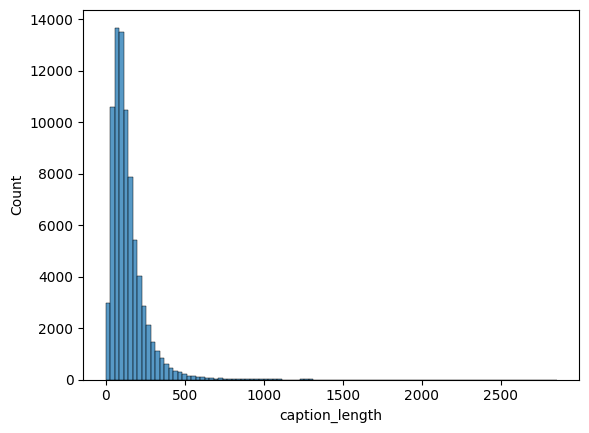

In [199]:
sns.histplot(df['caption_length'],bins=100)

In [200]:
from wordcloud import WordCloud

In [201]:
all_captions = ' '.join(df['caption'])

In [202]:
wordcloud = WordCloud(width=800, height=400, max_words=20).generate(all_captions)

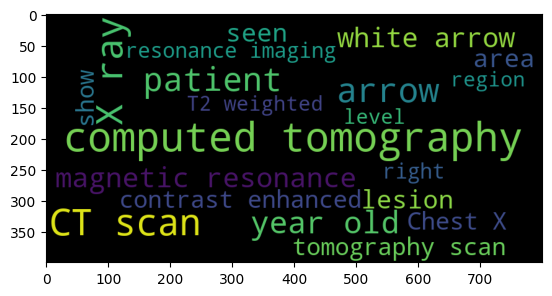

In [203]:
plt.imshow(wordcloud)

In [204]:
from collections import Counter
import re

In [205]:
words = re.findall(r'\w+', all_captions.lower())
# frequency of each word
word_counts = Counter(words)
# Display the most common words
print(word_counts.most_common(5))

[('the', 120433), ('of', 77601), ('and', 36235), ('a', 33406), ('in', 31768)]


In [206]:
top_words=word_counts.most_common(10)

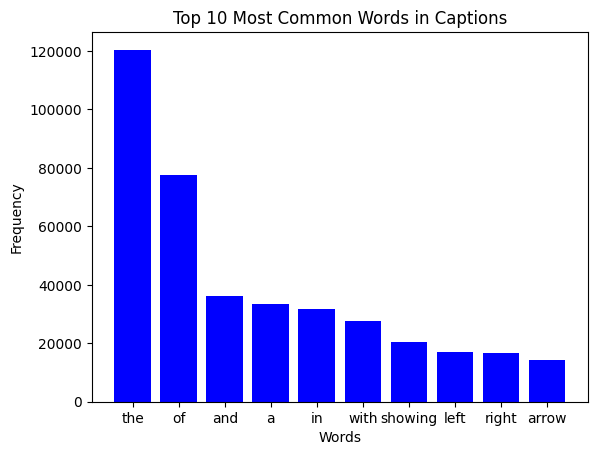

In [207]:
words, counts = zip(*top_words)
plt.bar(words, counts, color='blue')
plt.title("Top 10 Most Common Words in Captions")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

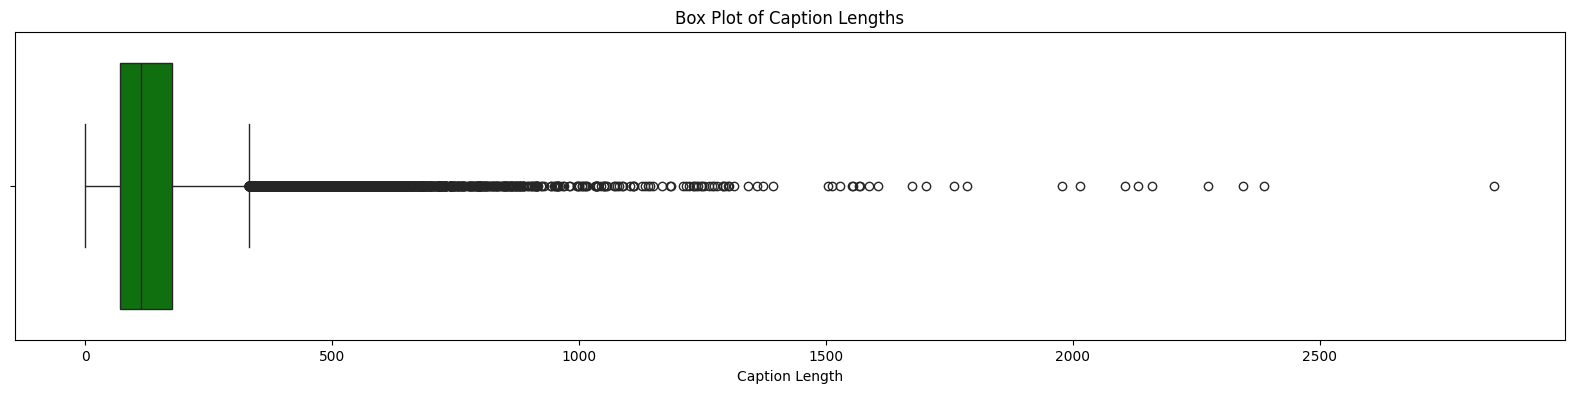

In [208]:
plt.figure(figsize=(20, 4))
sns.boxplot(x=df['caption_length'], color='green')
plt.title('Box Plot of Caption Lengths')
plt.xlabel('Caption Length')
plt.show()


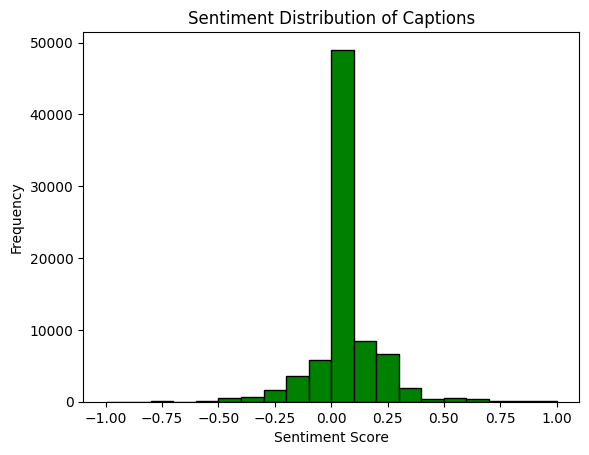

In [209]:
from textblob import TextBlob
sentiment_scores = df['caption'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.hist(sentiment_scores, bins=20, color='green', edgecolor='black')
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Sentiment Distribution of Captions")
plt.show()


### IMAGE PREPROCESSING

In [210]:
import cv2

In [211]:
image_files=[f for f in os.listdir(image_path) if f.endswith(".jpg")]

In [212]:
img_path=os.path.join(image_path,image_files[21])

In [213]:
img_path

'C:\\Users\\KIIT\\Documents\\roco_dataset_extracted\\all_data\\train\\radiology\\images\\PMC1087206_pmed.0020079.g004.jpg'

In [214]:
img=cv2.imread(img_path)
img

array([[[104, 111,  44],
        [ 90,  96,  31],
        [ 91,  95,  36],
        ...,
        [101, 108,  41],
        [101, 106,  44],
        [ 97, 103,  46]],

       [[ 87,  93,  28],
        [ 71,  76,  15],
        [ 70,  73,  17],
        ...,
        [ 70,  72,  26],
        [ 65,  66,  16],
        [ 61,  63,  11]],

       [[ 89,  93,  34],
        [ 71,  74,  18],
        [ 67,  69,  17],
        ...,
        [ 88,  84,  60],
        [ 63,  61,  27],
        [ 45,  44,   0]],

       ...,

       [[ 96,  99,  43],
        [ 75,  78,  23],
        [ 69,  70,  20],
        ...,
        [ 71,  71,  23],
        [ 63,  63,  15],
        [ 53,  53,   5]],

       [[ 87,  90,  35],
        [ 70,  72,  20],
        [ 66,  66,  18],
        ...,
        [ 67,  67,  19],
        [ 61,  61,  13],
        [ 52,  52,   4]],

       [[ 65,  68,  13],
        [ 52,  53,   3],
        [ 50,  50,   4],
        ...,
        [ 55,  55,   7],
        [ 52,  52,   4],
        [ 46,  46,   0]]

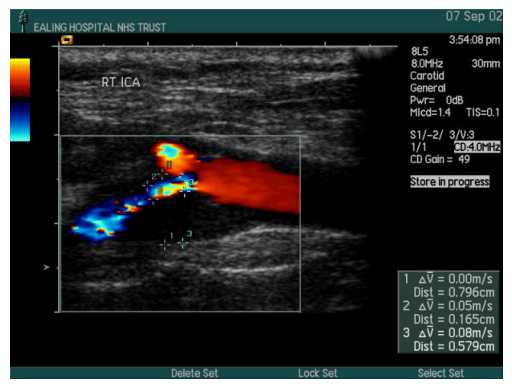

In [215]:
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off') 
plt.show()

In [216]:
image_rgb.shape

(485, 646, 3)

In [217]:
target_size=(224,224)
resizedimg=cv2.resize(image_rgb,target_size)

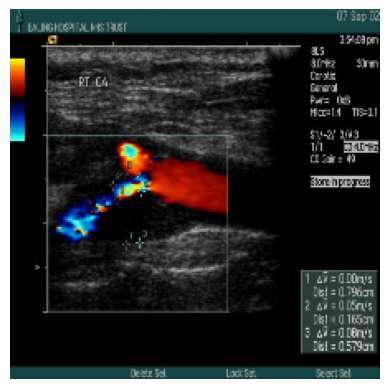

In [218]:
plt.imshow(resizedimg)
plt.axis('off')
plt.show()

In [219]:
resizedimg.shape

(224, 224, 3)

In [220]:
img_processed=image_rgb

In [221]:
img_normalized=img_processed/255

In [222]:
img_normalized

array([[[0.17254902, 0.43529412, 0.40784314],
        [0.12156863, 0.37647059, 0.35294118],
        [0.14117647, 0.37254902, 0.35686275],
        ...,
        [0.16078431, 0.42352941, 0.39607843],
        [0.17254902, 0.41568627, 0.39607843],
        [0.18039216, 0.40392157, 0.38039216]],

       [[0.10980392, 0.36470588, 0.34117647],
        [0.05882353, 0.29803922, 0.27843137],
        [0.06666667, 0.28627451, 0.2745098 ],
        ...,
        [0.10196078, 0.28235294, 0.2745098 ],
        [0.0627451 , 0.25882353, 0.25490196],
        [0.04313725, 0.24705882, 0.23921569]],

       [[0.13333333, 0.36470588, 0.34901961],
        [0.07058824, 0.29019608, 0.27843137],
        [0.06666667, 0.27058824, 0.2627451 ],
        ...,
        [0.23529412, 0.32941176, 0.34509804],
        [0.10588235, 0.23921569, 0.24705882],
        [0.        , 0.17254902, 0.17647059]],

       ...,

       [[0.16862745, 0.38823529, 0.37647059],
        [0.09019608, 0.30588235, 0.29411765],
        [0.07843137, 0

In [223]:
import tensorflow as tf

In [224]:
img=np.expand_dims(img,axis=0)

In [225]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=0.2
                                        )
it=datagen.flow(img,batch_size=1)
augmented_images=[next(it)[0] for _ in range(5)]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


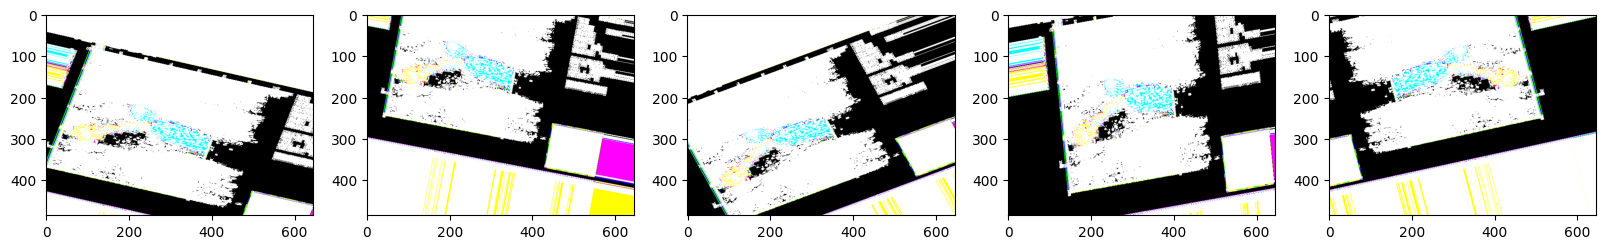

In [226]:

plt.figure(figsize=(20,5))
for i,aug_img in enumerate(augmented_images):
  plt.subplot(1,5,i+1)
  plt.imshow(aug_img)

In [227]:
image_rgb.shape

(485, 646, 3)

#### NLP PREPROCESSING TECHNIQUES

In [232]:
captions = " ".join(df['caption'])
print(captions[:500])

Computed tomography scan in axial view showing obliteration of the left maxillary sinus Bacterial contamination occurred after completion of root canal treatment in the tooth, which remained with a temporary filling for 15 month. The patient had residual paralysis of the hand after poliomyelitis. It was necessary to stabilize the thumb with reference to the index finger. This was accomplished by placing a graft from the bone bank between the first and second metacarpals. The roentgenogram shows 


In [233]:
captions=captions.lower()

In [234]:
from nltk.corpus import stopwords



In [235]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [236]:
stop_words=set(stopwords.words('english'))

In [287]:
text_input=" ".join([word for word in captions.split() if word not in stop_words])

In [238]:
from textblob import TextBlob

In [289]:
correct=TextBlob(text_input[:50]).correct()

In [290]:
correct

TextBlob("computer cosmography scan animal view showing oblige")

#### TOKENIZATION

In [291]:
from nltk.tokenize import sent_tokenize

In [292]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [293]:
sent_input=sent_tokenize(text_input)

In [295]:
print(sent_input[:2])

['computed tomography scan axial view showing obliteration left maxillary sinus bacterial contamination occurred completion root canal treatment tooth, remained temporary filling 15 month.', 'patient residual paralysis hand poliomyelitis.']


In [296]:
from nltk.tokenize import wordpunct_tokenize

In [297]:
word_input=wordpunct_tokenize(text_input)

In [298]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
tokenize_input=tokenizer.tokenize(text_input)

In [300]:
print(tokenize_input[:50])

['computed', 'tomography', 'scan', 'axial', 'view', 'showing', 'obliteration', 'left', 'maxillary', 'sinus', 'bacterial', 'contamination', 'occurred', 'completion', 'root', 'canal', 'treatment', 'tooth', ',', 'remained', 'temporary', 'filling', '15', 'month.', 'patient', 'residual', 'paralysis', 'hand', 'poliomyelitis.', 'necessary', 'stabilize', 'thumb', 'reference', 'index', 'finger.', 'accomplished', 'placing', 'graft', 'bone', 'bank', 'first', 'second', 'metacarpals.', 'roentgenogram', 'shows', 'complete', 'healing', 'graft', 'one', 'year']


### STEMMING

In [301]:
words=["eating","eats","eaten","writing","writes","programming"]

In [302]:
from nltk.stem import PorterStemmer

In [303]:
stemming=PorterStemmer()

In [304]:
stemming.stem("congratulations")

'congratul'

In [305]:
for word in words:
  print(word+"---"+stemming.stem(word))

eating---eat
eats---eat
eaten---eaten
writing---write
writes---write
programming---program


### REGEX STEMMER

In [306]:
from nltk.stem import RegexpStemmer

In [307]:
reg_stemmer=RegexpStemmer("ing$|e$|s$|able$")

In [308]:
reg_stemmer.stem("eating")

'eat'

In [309]:
reg_stemmer.stem("trains")

'train'

In [310]:
reg_stemmer.stem("ingeating")

'ingeat'

## SnowBallStemmer

In [311]:
from nltk.stem import SnowballStemmer

In [312]:
snowballstemmer=SnowballStemmer('english')

In [313]:
for word in words:
  print(word+"---"+snowballstemmer.stem(word))

eating---eat
eats---eat
eaten---eaten
writing---write
writes---write
programming---program


In [314]:
stemming.stem("sportingly"),snowballstemmer.stem("sportingly")

('sportingli', 'sport')

### LEMMATIZATION


In [315]:
from nltk.stem import WordNetLemmatizer
import nltk

In [316]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [317]:
lemmatizer=WordNetLemmatizer()

In [318]:
'''
Noun-n
verb-v
adjective-a
adverb-r
'''

'\nNoun-n\nverb-v\nadjective-a\nadverb-r\n'

In [319]:
lemmatizer.lemmatize("corpora",pos="n")

'corpus'

In [320]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## NER NAMED ENTITY RECOGNITION

In [321]:
text=captions

In [322]:
words=nltk.word_tokenize(captions)

In [323]:
nltk.download("maxent_ne_chunker")
nltk.download("words")

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [324]:
from nltk import ne_chunk

In [325]:
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


True

In [326]:
words[:5]

['computed', 'tomography', 'scan', 'in', 'axial']

In [327]:
import spacy
from spacy import displacy

# Load the small English model
nlp = spacy.load("en_core_web_sm")

# Process your text
text = "Apple is looking at buying UK startup for $1 billion"
doc = nlp(text)

# Visualize named entities
displacy.render(doc, style="ent", jupyter=True)


In [328]:
#on actual dataset
shortened_text = captions[:2000]

# Process the shortened text
doc2 = nlp(shortened_text)


displacy.render(doc2, style="ent", jupyter=True)

### CREATE BAG OF WORDS

In [329]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=100,binary=True)

In [332]:
sentences=["this is a NLP+CV project","Hi everyone NLP+CV"]

In [333]:
X=cv.fit_transform(sentences)

In [334]:
X.toarray()

array([[1, 0, 0, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 0, 0]], dtype=int64)

In [335]:
cv.get_feature_names_out()

array(['cv', 'everyone', 'hi', 'is', 'nlp', 'project', 'this'],
      dtype=object)

In [336]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=100,binary=True,ngram_range=(2,3))

In [337]:
X=cv.fit_transform(sentences)

In [338]:
cv.vocabulary_

{'this is': 9,
 'is nlp': 5,
 'nlp cv': 7,
 'cv project': 0,
 'this is nlp': 10,
 'is nlp cv': 6,
 'nlp cv project': 8,
 'hi everyone': 3,
 'everyone nlp': 1,
 'hi everyone nlp': 4,
 'everyone nlp cv': 2}

### TF-IDF

In [345]:
sentences=sent_input[:3]

In [346]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [347]:
sentences

['computed tomography scan axial view showing obliteration left maxillary sinus bacterial contamination occurred completion root canal treatment tooth, remained temporary filling 15 month.',
 'patient residual paralysis hand poliomyelitis.',
 'necessary stabilize thumb reference index finger.']

In [348]:
tfidf=TfidfVectorizer(max_features=100)
X=tfidf.fit_transform(sentences).toarray()

In [349]:
X

array([[0.20851441, 0.20851441, 0.20851441, 0.20851441, 0.20851441,
        0.20851441, 0.20851441, 0.20851441, 0.        , 0.        ,
        0.        , 0.20851441, 0.20851441, 0.20851441, 0.        ,
        0.20851441, 0.20851441, 0.        , 0.        , 0.        ,
        0.        , 0.20851441, 0.        , 0.20851441, 0.20851441,
        0.20851441, 0.20851441, 0.        , 0.20851441, 0.        ,
        0.20851441, 0.20851441, 0.20851441, 0.20851441],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.4472136 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.4472136 , 0.4472136 , 0.4472136 ,
        0.        , 0.        , 0.4472136 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
  

In [350]:
tfidf.vocabulary_

{'computed': 5,
 'tomography': 30,
 'scan': 24,
 'axial': 1,
 'view': 33,
 'showing': 25,
 'obliteration': 15,
 'left': 11,
 'maxillary': 12,
 'sinus': 26,
 'bacterial': 2,
 'contamination': 6,
 'occurred': 16,
 'completion': 4,
 'root': 23,
 'canal': 3,
 'treatment': 32,
 'tooth': 31,
 'remained': 21,
 'temporary': 28,
 'filling': 7,
 '15': 0,
 'month': 13,
 'patient': 18,
 'residual': 22,
 'paralysis': 17,
 'hand': 9,
 'poliomyelitis': 19,
 'necessary': 14,
 'stabilize': 27,
 'thumb': 29,
 'reference': 20,
 'index': 10,
 'finger': 8}

In [351]:


from gensim.models import Word2Vec,KeyedVectors

In [352]:


import gensim.downloader as api
wv=api.load("word2vec-google-news-300")

[=============================---------------------] 59.8% 994.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========================================--------] 84.8% 1409.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============================================-----] 91.7% 1524.1/1662.8MB downloaded

In [354]:

veec_FRA=wv["Fracture"]

In [355]:
veec_FRA

array([ 0.33203125, -0.17578125, -0.390625  , -0.07910156, -0.20703125,
        0.33984375, -0.13964844,  0.03125   , -0.18554688,  0.20117188,
        0.04833984,  0.24707031,  0.24902344, -0.07714844, -0.01525879,
        0.3359375 , -0.22949219,  0.04956055, -0.23828125,  0.25195312,
       -0.00331116,  0.1328125 ,  0.02185059,  0.33789062,  0.02319336,
       -0.20507812,  0.01220703,  0.27539062, -0.07910156, -0.29882812,
       -0.48828125, -0.05688477,  0.29492188, -0.43554688, -0.09082031,
        0.3359375 , -0.28515625,  0.07568359,  0.09082031, -0.10449219,
        0.25195312, -0.08837891, -0.24609375,  0.04272461, -0.03540039,
       -0.19335938,  0.07080078,  0.13476562,  0.17578125,  0.23046875,
       -0.26953125, -0.12304688, -0.484375  , -0.23828125,  0.3203125 ,
        0.07373047, -0.06933594, -0.1484375 ,  0.03271484,  0.24023438,
       -0.04443359,  0.28320312,  0.05639648, -0.21191406, -0.46679688,
       -0.15722656, -0.22949219,  0.01306152,  0.07910156, -0.04

In [361]:
wv.most_similar("bone")

[('bones', 0.7579556107521057),
 ('cartilage', 0.6415287256240845),
 ('femur', 0.6215968132019043),
 ('tendon', 0.5869171023368835),
 ('tibia_bone', 0.5778136253356934),
 ('muscle_tissue', 0.5722456574440002),
 ('spinal_vertebrae', 0.570504903793335),
 ('anklebone', 0.5641931295394897),
 ('cortical_bone', 0.5611963868141174),
 ('rib', 0.5472856163978577)]

In [362]:
wv.most_similar("scan")

[('scans', 0.8668808937072754),
 ('scanning', 0.7109993696212769),
 ('scanned', 0.6856041550636292),
 ('X_ray', 0.6038687229156494),
 ('Scans', 0.595517098903656),
 ('x_ray', 0.5876577496528625),
 ('X_ray_scans', 0.5838457942008972),
 ('MRI_scan', 0.5811927318572998),
 ('roseau_cane_ringing', 0.5774956941604614),
 ('x_rays', 0.5774388909339905)]

In [363]:
wv.most_similar("disease")

[('diseases', 0.7807157039642334),
 ('infection', 0.6768243908882141),
 ('Disease', 0.6753760576248169),
 ('cancer', 0.6603150963783264),
 ('diease', 0.6553967595100403),
 ('WNV_infection', 0.6355717182159424),
 ('mosquito_borne_virus', 0.6342822909355164),
 ('inherited_neurodegenerative_disorder', 0.6336308121681213),
 ('infections', 0.6328331828117371),
 ('PCVAD', 0.6308076977729797)]

### VG16 FEATURE MAP EXTRACTION

In [394]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

In [395]:
  base_model=VGG16(weights="imagenet")

In [396]:
from tensorflow.keras.preprocessing import image

In [397]:
model=Model(inputs=base_model.input,outputs=base_model.get_layer("block5_conv3").output)     

In [398]:
def load_and_preprocess_image(img_path,target_size=(224,224)):
  img=image.load_img(r"C:/Users/KIIT/Documents/roco_dataset_extracted/all_data/train/radiology/images/PMC1459185_1748-717X-1-7-8.jpg",target_size=target_size)
  img_array=image.img_to_array(img)
  img_array=np.expand_dims(img_array,axis=0)
  img_array=preprocess_input(img_array)
  return img_array

In [402]:
img=image.load_img(r"C:/Users/KIIT/Documents/roco_dataset_extracted/all_data/train/radiology/images/PMC1459185_1748-717X-1-7-8.jpg",target_size=(224,224))
img_array=image.img_to_array(img)

In [403]:
img_array.shape

(224, 224, 3)

In [406]:
img_array=np.expand_dims(img_array,axis=0)
img_array.shape

(1, 224, 224, 3)

In [409]:
img_array=preprocess_input(img_array)
img_array.shape

(1, 224, 224, 3)

In [410]:
feature_map=model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


In [411]:
n_features=feature_map.shape[-1]

In [412]:
n_features

512

In [413]:
size=feature_map.shape[1]

In [414]:
from PIL import Image

In [415]:
img=Image.open(img_path)

In [416]:
img.size

(600, 491)

In [417]:
display_grid=np.zeros((size,size*n_features))

In [418]:
display_grid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [419]:
for i in range(n_features):
  x=feature_map[0,:,:,i]
  x-=x.mean()
  x/=(x.std()+1e-5)
  x*=64
  x+=128
  x=np.clip(x,0,255).astype(int)
  display_grid[:,i*size:(i+1)*size]=x

In [420]:
scale=20./n_features

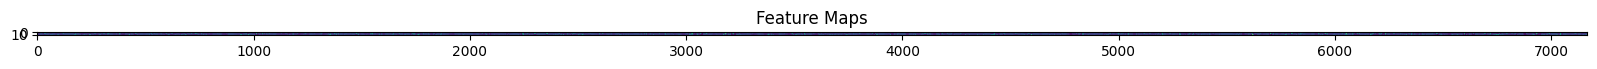

In [421]:
plt.figure(figsize=(scale*n_features,scale))
plt.title("Feature Maps")
plt.grid(False)
plt.imshow(display_grid,aspect="auto")

### ANN

In [422]:
df

,image_id,caption,label,split,caption_length
0,ROCO_00002\t,Computed tomography scan in axial view showing...,radiology,train,87
1,ROCO_00003\t,Bacterial contamination occurred after complet...,radiology,train,141
2,ROCO_00004\t,The patient had residual paralysis of the hand...,radiology,train,319
3,ROCO_00005\t,Panoramic radiograph after immediate loading.,radiology,train,45
4,ROCO_00007\t,Plain abdomen x-ray: Multiple air levels at th...,radiology,train,123
...,...,...,...,...,...
79743,ROCO_87894\t,Scanning electron photomicrograph of blood cel...,non-radiology,validation,111
79744,ROCO_87904\t,SEM of Solenopsis elhawagryi sp. n. minor work...,non-radiology,validation,73
79745,ROCO_87918\t,Under visualization through the anterolateral ...,non-radiology,validation,303
79746,ROCO_87936\t,The endoscopic view demonstrated progressive d...,non-radiology,validation,84


In [423]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [436]:
tfidf=TfidfVectorizer(max_features=1000)

In [437]:
X=tfidf.fit_transform(df['caption']).toarray()
y=df['label']

In [438]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [439]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [440]:
model=Sequential([
                Dense(64,activation="relu",input_shape=(X.shape[1],)),
                Dropout(0.5),
                Dense(32,activation="relu"),
                Dense(1,activation="sigmoid")

])

C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [441]:
model.compile(optimizer=Adam(learning_rate=0.001),loss=BinaryCrossentropy(),metrics=['accuracy'])

In [442]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
model.fit(X,y,epochs=10)

Epoch 1/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9231 - loss: 0.2291
Epoch 2/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9346 - loss: 0.1655
Epoch 3/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9392 - loss: 0.1565
Epoch 4/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9408 - loss: 0.1510
Epoch 5/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9422 - loss: 0.1483
Epoch 6/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9473 - loss: 0.1411
Epoch 7/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9482 - loss: 0.1373
Epoch 8/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9495 - loss: 0.1343
Epoch 9/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9516 - loss: 0.1298
Epoch 10/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9537 - loss: 0.1257


In [443]:
loss,accuracy=model.evaluate(X,y)

2493/2493 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9845 - loss: 0.0489


In [444]:
loss,accuracy

(0.1094077080488205, 0.9612028002738953)

In [445]:
model.predict(X)

2493/2493 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


array([[0.9967543 ],
       [0.9738517 ],
       [0.77693635],
       ...,
       [0.21674785],
       [0.27909556],
       [0.8563373 ]], dtype=float32)

In [446]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [435]:
!pip install faker


In [255]:
from faker import Faker

In [256]:
fake=Faker()
Faker.seed(42)

In [257]:
def generate_text_labels(num_samples=5000):
  text=[fake.sentence(nb_words=10) for i in range(num_samples)]
  labels=np.random.randint(0,2,num_samples)
  return text,labels

In [258]:
text,labels=generate_text_labels()

In [259]:
text

['Agent every development say quality throughout beautiful.',
 'All behavior discussion own night respond red information last everything thank.',
 'Recently future choice whatever from behavior benefit suggest.',
 'Enough analysis least by two bad fall pick those gun court attorney product.',
 'World talk term herself law street class great prove.',
 'Participant commercial rock clear here writer.',
 'Detail food shoulder argue start source husband at tree note responsibility defense material.',
 'Central cause seat much section investment on gun young catch management.',
 'Technology check civil quite others his.',
 'You more wife team activity result race Mr environment political born itself law.',
 'Will seven medical blood personal success medical current hear.',
 'Much single morning a food affect upon these.',
 'Dream drive note bad rule staff within mouth call.',
 'Water close month parent who up sense ready require human public health.',
 'Later easy ask again network open acc

In [260]:
labels

array([1, 1, 0, ..., 1, 1, 1], dtype=int32)

In [261]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [262]:
tokenizer=Tokenizer(num_words=5000)

In [263]:
tokenizer.fit_on_texts(text)

In [264]:
sequences=tokenizer.texts_to_sequences(text)

In [265]:
sequences

[[738, 228, 739, 821, 378, 191, 650],
 [330, 29, 379, 487, 192, 782, 229, 740, 282, 42, 822],
 [230, 30, 331, 117, 741, 29, 231, 22],
 [651, 91, 283, 590, 284, 118, 285, 652, 119, 120, 783, 784, 332],
 [424, 193, 23, 425, 16, 43, 785, 426, 742],
 [333, 956, 286, 121, 334, 743],
 [957, 696, 92, 335, 653, 75, 122, 427, 428, 76, 591, 232, 194],
 [592, 233, 915, 697, 336, 593, 698, 120, 429, 123, 699],
 [744, 870, 700, 195, 337, 338],
 [5, 60, 44, 594, 339, 234, 488, 287, 288, 31, 654, 289, 16],
 [538, 430, 340, 61, 290, 235, 340, 952, 786],
 [697, 45, 964, 431, 696, 871, 936, 432],
 [380, 291, 76, 118, 823, 787, 152, 539, 341],
 [46, 655, 489, 32, 656, 196, 24, 197, 342, 788, 153, 236],
 [490, 491, 492, 62, 595, 824, 343, 745, 237, 2, 330, 596],
 [540, 292, 238, 433, 825, 124, 344, 541, 542, 77, 434, 381],
 [154, 78, 8, 701, 493, 382, 286, 345, 597, 783, 890],
 [33, 42, 63, 746, 383, 744, 93],
 [543, 155, 916, 29, 747, 702],
 [494, 657, 122, 198, 598, 424, 435, 541, 293, 294, 117],
 [332,

In [266]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequences=pad_sequences(sequences,maxlen=20)

In [267]:
padded_sequences[:2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        738, 228, 739, 821, 378, 191, 650],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 330,  29, 379, 487,
        192, 782, 229, 740, 282,  42, 822]], dtype=int32)

In [268]:
train_size=int(0.8*len(padded_sequences))

In [269]:
train_size

4000

In [270]:
X_train,X_test=padded_sequences[:train_size],padded_sequences[train_size:]
y_train,y_test=labels[:train_size],labels[train_size:]

In [271]:
X_train

array([[  0,   0,   0, ..., 378, 191, 650],
       [  0,   0,   0, ..., 282,  42, 822],
       [  0,   0,   0, ...,  29, 231,  22],
       ...,
       [  0,   0,   0, ..., 220, 935, 730],
       [  0,   0,   0, ..., 734, 649, 361],
       [  0,   0,   0, ...,   6,  63, 515]], dtype=int32)

In [272]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense

In [273]:
model=Sequential([Embedding(input_dim=5000,output_dim=64,input_length=20),
                  SimpleRNN(64,return_sequences=False),
                  Dense(1,activation="sigmoid")
])

C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [274]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [275]:
model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.4741 - loss: 0.7003 - val_accuracy: 0.5300 - val_loss: 0.6911
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7703 - loss: 0.6017 - val_accuracy: 0.5362 - val_loss: 0.7286
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9064 - loss: 0.3118 - val_accuracy: 0.5512 - val_loss: 0.9896
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9758 - loss: 0.1120 - val_accuracy: 0.5350 - val_loss: 1.4325
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9970 - loss: 0.0279 - val_accuracy: 0.5325 - val_loss: 1.7867
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9998 - loss: 0.0083 - val_accuracy: 0.5412 - val_loss: 1.9363
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.5375 - val_loss: 2.0638
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accu

In [276]:
model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


array([[9.56827104e-01],
       [7.61795163e-05],
       [9.98985052e-01],
       [9.97681737e-01],
       [9.44987476e-01],
       [3.16168256e-02],
       [4.44886088e-03],
       [9.99834120e-01],
       [3.29082638e-01],
       [9.97376323e-01],
       [9.99977589e-01],
       [3.38663551e-04],
       [9.38386977e-01],
       [8.86263192e-01],
       [9.03733730e-01],
       [2.90561616e-01],
       [1.77012570e-02],
       [9.99983490e-01],
       [9.36215997e-01],
       [1.85556931e-03],
       [7.67735481e-01],
       [9.48351145e-01],
       [7.93675776e-04],
       [1.08166113e-02],
       [3.74333504e-05],
       [7.68033981e-01],
       [1.17464278e-05],
       [9.99987900e-01],
       [9.83752191e-01],
       [2.64485972e-03],
       [8.75477195e-01],
       [3.15992296e-01],
       [6.88205004e-01],
       [3.88385206e-02],
       [9.84981954e-01],
       [1.29394059e-03],
       [9.99517322e-01],
       [7.83314521e-04],
       [3.69751900e-01],
       [9.51285243e-01],
